In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [409]:
waste_original_file_energy = pd.read_csv("Waste_data.csv")

In [410]:
# Filter the DataFrame to keep only rows where 'Gas' is equal to 'CO2e (t) GWP-AR2'
filtered_df = waste_original_file_energy[waste_original_file_energy['Gas'] == 'CO2e (t) GWP-AR2']

# Save the filtered DataFrame to a new CSV file
output_file_name = 'waste_filtered_CO2e_GWP_AR2.csv'
filtered_df.to_csv(output_file_name, index=False)

print(f"Filtered data saved to {output_file_name}")


Filtered data saved to waste_filtered_CO2e_GWP_AR2.csv


In [411]:
waste_filtered_gwp_ar2 = pd.read_csv("waste_filtered_CO2e_GWP_AR2.csv")

In [412]:
waste_filtered_gwp_ar2

,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Emission / Removal / Bunker,Gas,State,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Waste,Industrial Wastewater,Iron & Steel,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Andaman & Nicobar Islands,...,0,0,0,0,0,0,0,0,0,0
1,Waste,Industrial Wastewater,Iron & Steel,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Andhra Pradesh,...,0,0,0,0,0,0,0,0,0,0
2,Waste,Industrial Wastewater,Iron & Steel,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Arunachal Pradesh,...,0,0,0,0,0,0,0,0,0,0
3,Waste,Industrial Wastewater,Iron & Steel,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Assam,...,0,0,0,0,0,0,0,0,0,0
4,Waste,Industrial Wastewater,Iron & Steel,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Bihar,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Waste,Solid Waste Disposal,NaN,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Telangana,...,0,0,0,0,0,0,0,0,0,85319
500,Waste,Solid Waste Disposal,NaN,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Tripura,...,14990,16510,18054,19625,21222,22847,24501,26363,28410,28954
501,Waste,Solid Waste Disposal,NaN,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Uttar Pradesh,...,923222,962104,1001787,1042257,1083502,1125513,1168280,1213411,1260690,1309935
502,Waste,Solid Waste Disposal,NaN,NaN,NaN,NaN,NaN,Emissions,CO2e (t) GWP-AR2,Uttarakhand,...,29623,35390,40732,45722,50424,54892,59171,63458,67763,72098


In [454]:



# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Dictionary to store results for each category
category_sums = {}

# Calculate the summation for each category in 'Level 1'
for category in waste_filtered_gwp_ar2['Level 2'].unique():
    # Filter rows for the current category
    category_df = waste_filtered_gwp_ar2[waste_filtered_gwp_ar2['Level 2'] == category]
    
    # Sum emissions for each year
    category_sums[category] = category_df[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
category_sums_df = pd.DataFrame(category_sums, index=year_columns).transpose()

# Add a row for the final summation for all categories
category_sums_df.loc['Total'] = category_sums_df.sum()

# Display the results
print(category_sums_df)

# Save the results to a CSV file
category_sums_df.to_csv('waste_yearly_emissions_by_category_level2_and_total.csv')
print("Yearly emissions by category and totals saved to 'waste_yearly_emissions_by_category_level2_and_total.csv'")

                          2005     2006     2007     2008     2009     2010  \
Industrial Wastewater 13389055 14215099 15301697 16263102 17254772 18303893   
Domestic Wastewater   43823823 44530585 45237347 45900219 46507459 47231188   
Solid Waste Disposal   7045730  7545554  8033160  8511577  8983359  9450661   
Total                 64258608 66291239 68572204 70674898 72745589 74985743   

                          2011     2012     2013     2014     2015  
Industrial Wastewater 19376624 20953220 22174125 23499948 24223528  
Domestic Wastewater   56900002 57919280 58938558 60037112 61026372  
Solid Waste Disposal   9915301 10373106 10852447 11258895 11668410  
Total                 86191927 89245607 91965130 94795955 96918310  
Yearly emissions by category and totals saved to 'waste_yearly_emissions_by_category_level2_and_total.csv'


In [455]:
waste_yearly_emissions_by_category_level2_and_total = pd.read_csv('waste_yearly_emissions_by_category_level2_and_total.csv')

In [456]:
# Rename the unnamed column (assuming it's the first column)
waste_yearly_emissions_by_category_level2_and_total = waste_yearly_emissions_by_category_level2_and_total.rename(columns={waste_yearly_emissions_by_category_level2_and_total.columns[0]: 'Category'})
waste_yearly_emissions_by_category_level2_and_total

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Industrial Wastewater,13389055,14215099,15301697,16263102,17254772,18303893,19376624,20953220,22174125,23499948,24223528
1,Domestic Wastewater,43823823,44530585,45237347,45900219,46507459,47231188,56900002,57919280,58938558,60037112,61026372
2,Solid Waste Disposal,7045730,7545554,8033160,8511577,8983359,9450661,9915301,10373106,10852447,11258895,11668410
3,Total,64258608,66291239,68572204,70674898,72745589,74985743,86191927,89245607,91965130,94795955,96918310


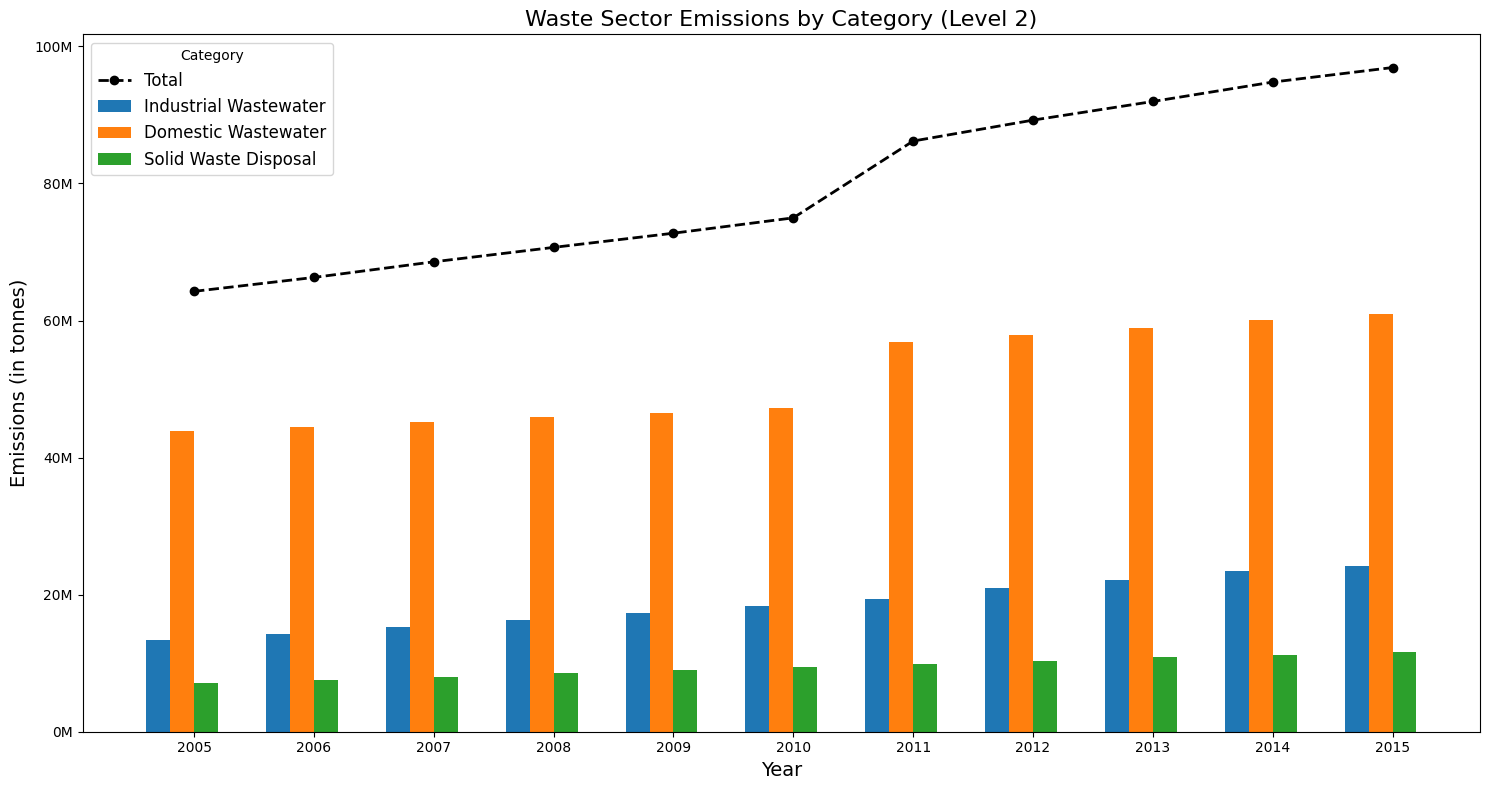

In [459]:
import matplotlib.pyplot as plt

# Remove the 'Total' row for category-based plotting
category_df = waste_yearly_emissions_by_category_level2_and_total[
    waste_yearly_emissions_by_category_level2_and_total['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = waste_yearly_emissions_by_category_level2_and_total[
    waste_yearly_emissions_by_category_level2_and_total['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Bar width
bar_width = 0.2
x_indexes = range(len(years))

# Iterate through each category and plot its bars
for i, category in enumerate(category_df['Category']):
    ax.bar(
        [x + i * bar_width for x in x_indexes],  # Offset bars for each category
        category_df.loc[category_df['Category'] == category, years].values.flatten(),
        width=bar_width,
        label=category
    )

# Plot the total emissions as a line
ax.plot(
    [x + 1.5 * bar_width for x in x_indexes],  # Align with the center of grouped bars
    total_emissions[years].values.flatten(),
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("Waste Sector Emissions by Category (Level 2)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks([x + 1.5 * bar_width for x in x_indexes])  # Center labels
ax.set_xticklabels(years, rotation=0)  # Make the X-axis labels horizontal

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Add legend
ax.legend(title="Category", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


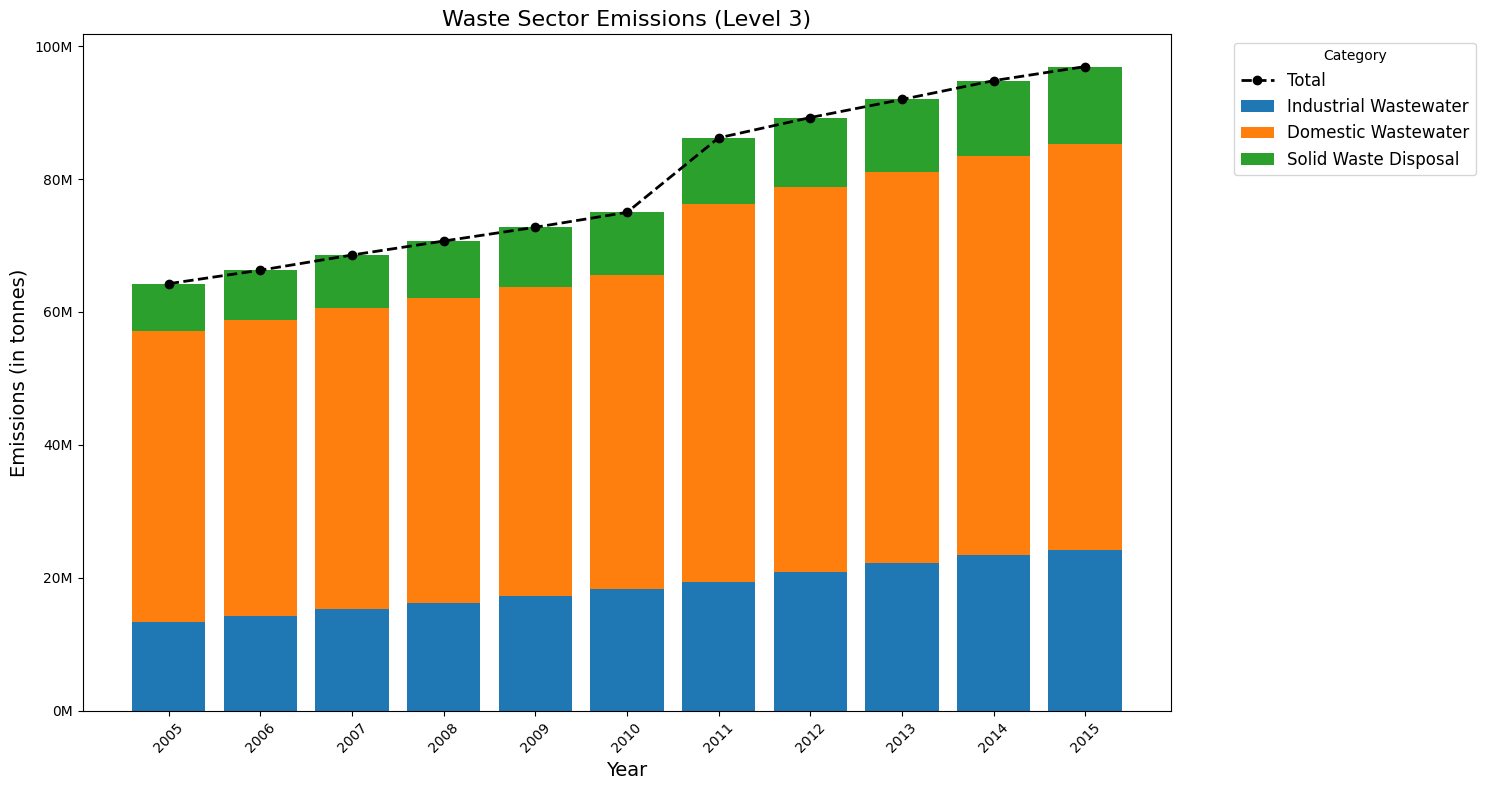

In [460]:
import matplotlib.pyplot as plt
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = waste_yearly_emissions_by_category_level2_and_total[
    waste_yearly_emissions_by_category_level2_and_total['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = waste_yearly_emissions_by_category_level2_and_total[
    waste_yearly_emissions_by_category_level2_and_total['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Prepare data for the stacked bar chart
category_data = category_df.set_index('Category')[years].T  # Transpose for easier stacking
categories = category_data.columns  # Extract the categories

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through each category and stack the bars
for category in categories:
    ax.bar(
        years,
        category_data[category],
        bottom=bottom_values,  # Stack on top of previous category
        label=category
    )
    bottom_values += category_data[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years,
    total_emissions_data,
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("Waste Sector Emissions (Level 3)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks(range(len(years)))  # Set ticks to match the years
ax.set_xticklabels(years, rotation=45)

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Add legend and place it outside the plot
ax.legend(title="Category", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with the legend outside
plt.tight_layout()
plt.show()

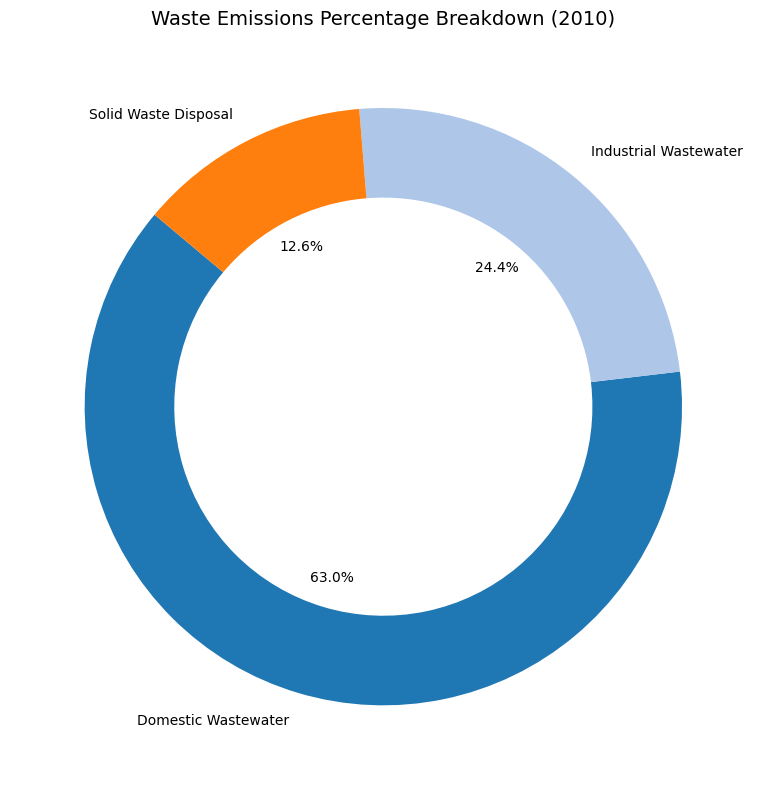

In [464]:
import matplotlib.pyplot as plt

# Extract data for the year 2010
year = "2010"
data_2010 = category_data.loc[year]

# Filter out negative values (removals or net reductions)
positive_data_2010 = data_2010[data_2010 > 0]

# Sort and extract the top 5 categories
top_5 = positive_data_2010.nlargest(5)

# Sum the remaining emissions as "Others"
others = positive_data_2010.sum() - top_5.sum()

# Add "Others" to the top 5 data
top_5["Others"] = others

# Remove the label for "Others" from the pie chart
labels = top_5.index
labels = [label if label != "Others" else "" for label in labels]  # Remove the "Others" label

# Plot donut chart
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size as needed
ax.pie(
    top_5, 
    labels=labels,  # Use the modified labels without "Others"
    autopct=lambda pct: ('%1.1f%%' % pct) if pct > 2 else '',  # Show percentages conditionally
    startangle=140,     # Start angle for better appearance
    colors=plt.cm.tab20.colors[:len(top_5)],  # Use consistent category colors
    wedgeprops={'width': 0.3}  # Reduced width for the donut chart
)

# Title
ax.set_title(f"Waste Emissions Percentage Breakdown ({year})", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [466]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'GHG Estimates-Table 1.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Filter and aggregate data for the year 2005
year = "2005"
emission_col = year
data_2005 = data.dropna(subset=[emission_col])  # Drop rows with missing values in the 2005 column
data_2005[emission_col] = pd.to_numeric(data_2005[emission_col], errors='coerce')  # Ensure numeric

# Summarize emissions by hierarchical levels
sunburst_data = data_2005.groupby(
    ["Level 1", "Level 2", "Level 3", "Level 4"]
)[emission_col].sum().reset_index()

# Create the sunburst plot
fig = px.sunburst(
    sunburst_data,
    path=["Level 1", "Level 2", "Level 3", "Level 4"],
    values=emission_col,
    title=f"Economy-Wide Emissions in {year}",
    color="Level 1",
)

# Show the plot
fig.show()

# Optionally, save the plot as an HTML file
fig.write_html("Economy_Wide_Emissions_2005.html")


ModuleNotFoundError: No module named 'plotly'

In [419]:
import pandas as pd

# Assuming the data is loaded into a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file, load it first

# For now, I'm assuming 'df' is already loaded with your data

# Select only the columns 'State' and emissions for 2010
# We're assuming that all the emissions columns are in a specific column like '2010'
emissions_2010 = waste_filtered_gwp_ar2[['State', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Remove rows with missing emissions values for 2010
emissions_2010 = emissions_2010.dropna(subset=['2010'])

# Sum the emissions for all categories for each state for the year 2010
state_emissions_2010 = emissions_2010.groupby('State')['2010'].sum()

# Sort the states by total emissions in 2010 in descending order
top_states_2010 = state_emissions_2010.sort_values(ascending=False)

top_states_2010_waste = top_states_2010

# Add a new column 'energy_values' with the same values as the sorted emissions
top_states_2010_waste_df = top_states_2010.reset_index()  # Convert the Series to a DataFrame
top_states_2010_waste_df.columns = ['State', 'waste_values']  # Rename columns

# Save the DataFrame to a CSV file
top_states_2010_waste_df.to_csv('top_states_2010_waste.csv', index=False)

# Display a confirmation message
print("Data saved to 'top_states_2010_waste.csv'.")


Data saved to 'top_states_2010_waste.csv'.
